C:\Users\a0095989\AppData\Local\Temp\ipykernel_13360\1325928353.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = data_country['AverageTemperature'].resample('M').mean()
C:\Users\a0095989\AppData\Local\Temp\ipykernel_13360\1325928353.py:21: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_temp = data_country['AverageTemperature'].resample('Y').mean()


Performing seasonal decomposition for monthly averages...
Performing seasonal decomposition for yearly averages...


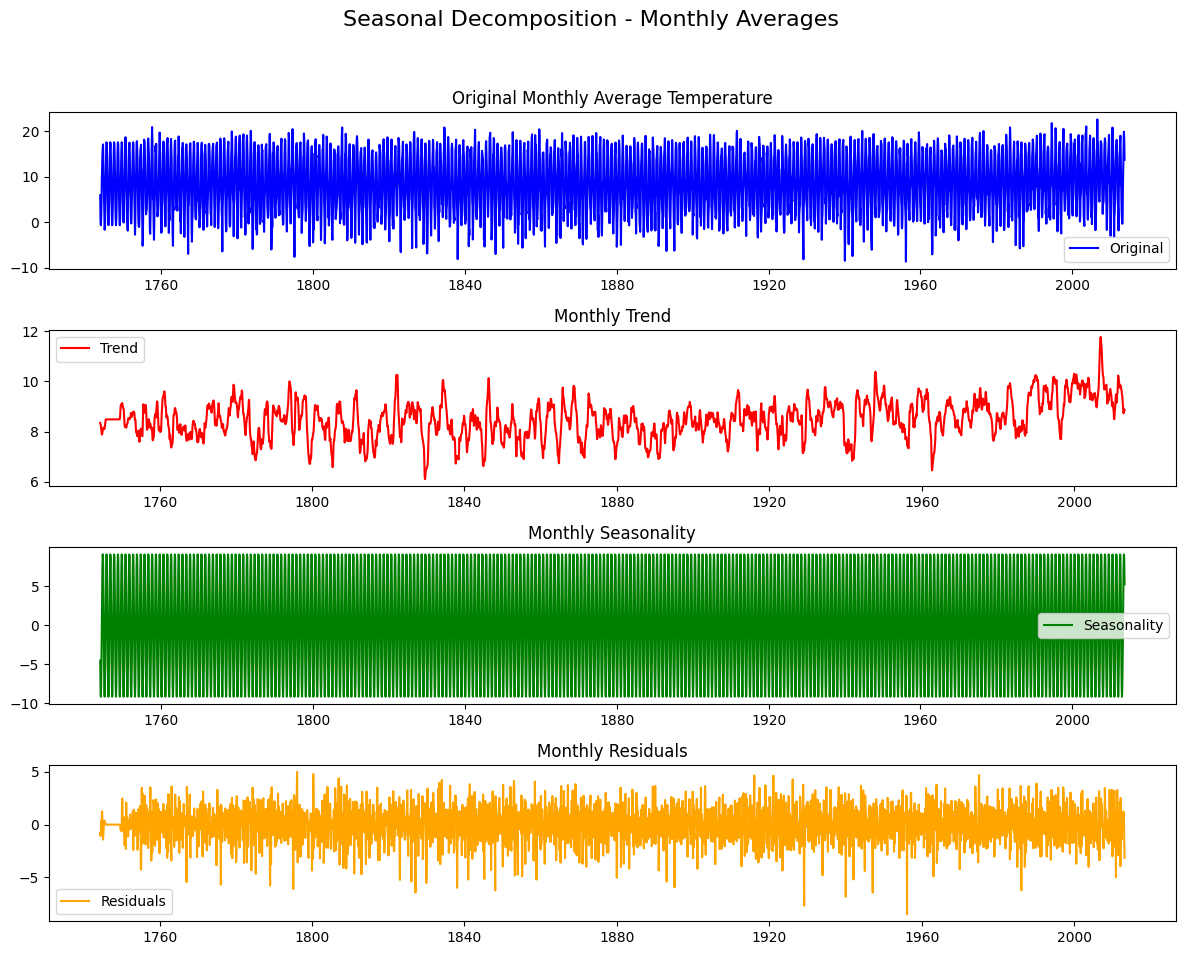

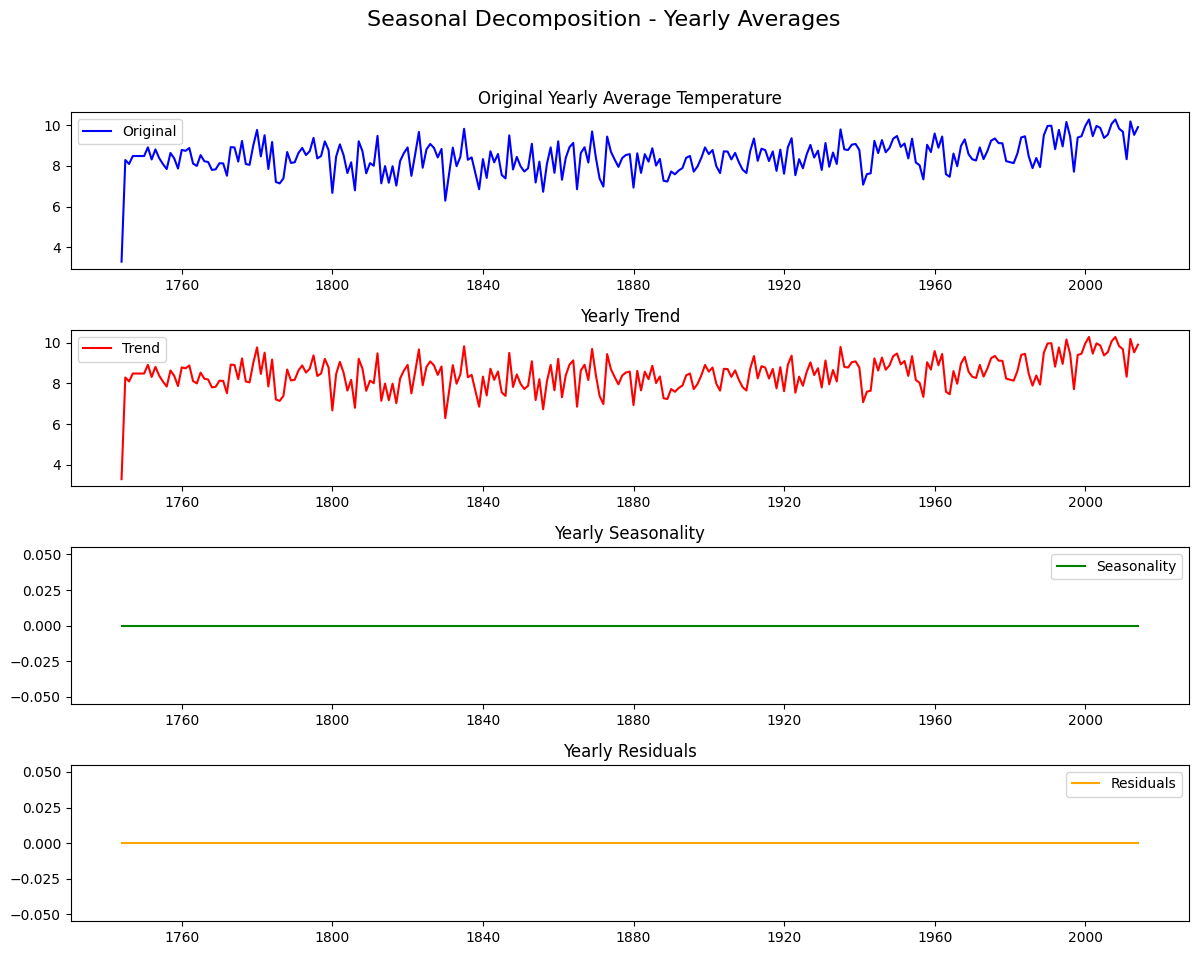

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load your dataset
data_count = pd.read_csv('C:/Users/a0095989/Desktop/important/Thesis/Model_Thesis/imputed_deu_data1.csv', parse_dates=[0])
#print(data_count.head())

# Step 2: Filter data for Germany
data_country = data_count[data_count['Country'] == 'Germany']

# Step 3: Set the 'dt' column as the DateTime index
data_country['dt'] = pd.to_datetime(data_country['dt'], errors='coerce')  # Ensure 'dt' is in datetime format
data_country = data_country.set_index('dt')

# Step 4: Calculate Monthly and Yearly Averages
# Monthly Averages
monthly_avg_temp = data_country['AverageTemperature'].resample('M').mean()

# Yearly Averages
yearly_avg_temp = data_country['AverageTemperature'].resample('Y').mean()

# Step 5: Perform Seasonal Decomposition for Monthly Data
print("Performing seasonal decomposition for monthly averages...")
monthly_decomposition = seasonal_decompose(monthly_avg_temp, model='additive', period=12)

# Extract components for monthly data
monthly_trend = monthly_decomposition.trend
monthly_seasonal = monthly_decomposition.seasonal
monthly_residual = monthly_decomposition.resid

# Step 6: Perform Seasonal Decomposition for Yearly Data
print("Performing seasonal decomposition for yearly averages...")
yearly_decomposition = seasonal_decompose(yearly_avg_temp, model='additive', period=1)

# Extract components for yearly data
yearly_trend = yearly_decomposition.trend
yearly_seasonal = yearly_decomposition.seasonal
yearly_residual = yearly_decomposition.resid

# Step 7: Plot Monthly Decomposition
plt.figure(figsize=(12, 10))
plt.suptitle("Seasonal Decomposition - Monthly Averages", fontsize=16)

plt.subplot(4, 1, 1)
plt.plot(monthly_avg_temp, label='Original', color='blue')
plt.title('Original Monthly Average Temperature')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(monthly_trend, label='Trend', color='red')
plt.title('Monthly Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(monthly_seasonal, label='Seasonality', color='green')
plt.title('Monthly Seasonality')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(monthly_residual, label='Residuals', color='orange')
plt.title('Monthly Residuals')
plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Step 8: Plot Yearly Decomposition
plt.figure(figsize=(12, 10))
plt.suptitle("Seasonal Decomposition - Yearly Averages", fontsize=16)

plt.subplot(4, 1, 1)
plt.plot(yearly_avg_temp, label='Original', color='blue')
plt.title('Original Yearly Average Temperature')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(yearly_trend, label='Trend', color='red')
plt.title('Yearly Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(yearly_seasonal, label='Seasonality', color='green')
plt.title('Yearly Seasonality')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(yearly_residual, label='Residuals', color='orange')
plt.title('Yearly Residuals')
plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [11]:
# Calculate annual averages for these features
annual_data = data_country.groupby('Year').agg({
    'TemperatureAnomaly': 'mean',
    'yearly_avg_temp': 'mean',
    'TemperatureChange': 'mean'
}).reset_index()

# Display the aggregated data
print(annual_data.head())

# 2. **Aggregate Data at Yearly and Seasonal Levels**

# For seasonal data, we can group by Year and Season and calculate the average
seasonal_data = data_country.groupby(['Year', 'Season']).agg({
    'TemperatureAnomaly': 'mean',
    'YearlyAvgTemperature': 'mean',
    'TemperatureChange': 'mean'
}).reset_index()

# Display the seasonal data
print(seasonal_data.head())

# 3. **Consider Rolling Averages (e.g., 5-year Moving Average)**

# Calculate 5-year moving averages for 'TemperatureAnomaly', 'YearlyAvgTemperature', and 'TemperatureChange'
annual_data['TemperatureAnomaly_5yr_MA'] = annual_data['TemperatureAnomaly'].rolling(window=10).mean()
annual_data['YearlyAvgTemperature_5yr_MA'] = annual_data['YearlyAvgTemperature'].rolling(window=10).mean()
annual_data['TemperatureChange_5yr_MA'] = annual_data['TemperatureChange'].rolling(window=10).mean()
# Display the data with moving averages
print(annual_data.head())
# Compute annual trend in TemperatureAnomaly (difference between the first and last values in the year)
# Use 'agg' to calculate the first and last values of TemperatureAnomaly for each year
annual_first_last = data_country.groupby('Year')['TemperatureAnomaly'].agg(['first', 'last']).reset_index()

# Compute the annual trend as the difference between the last and first values of TemperatureAnomaly
annual_first_last['TemperatureAnomaly_Trend'] = annual_first_last['last'] - annual_first_last['first']

# Merge the trend back to the annual_data DataFrame
annual_data = annual_data.merge(annual_first_last[['Year', 'TemperatureAnomaly_Trend']], on='Year', how='left')

# Display the annual trend data
print(annual_data[['Year', 'TemperatureAnomaly_Trend']].head())

# Compute seasonal trend in TemperatureAnomaly (difference between the first and last values in the season)
# Use 'agg' to calculate the first and last values of TemperatureAnomaly for each year and season
seasonal_first_last = data_country.groupby(['Year', 'Season'])['TemperatureAnomaly'].agg(['first', 'last']).reset_index()

# Compute the seasonal trend as the difference between the last and first values of TemperatureAnomaly
seasonal_first_last['TemperatureAnomaly_Trend'] = seasonal_first_last['last'] - seasonal_first_last['first']

# Merge the seasonal trend back to the seasonal_data DataFrame
seasonal_data = seasonal_data.merge(seasonal_first_last[['Year', 'Season', 'TemperatureAnomaly_Trend']], on=['Year', 'Season'], how='left')

# Display the seasonal trend data
print(seasonal_data[['Year', 'Season', 'TemperatureAnomaly_Trend']].head())

# Create a normalized temperature anomaly index (Z-score) for annual data
annual_data['TemperatureAnomaly_Z'] = (annual_data['TemperatureAnomaly'] - annual_data['TemperatureAnomaly'].mean()) / annual_data['TemperatureAnomaly'].std()

# Display the normalized temperature anomaly index
print(annual_data[['Year', 'TemperatureAnomaly_Z']].head())



KeyError: "Column(s) ['yearly_avg_temp'] do not exist"

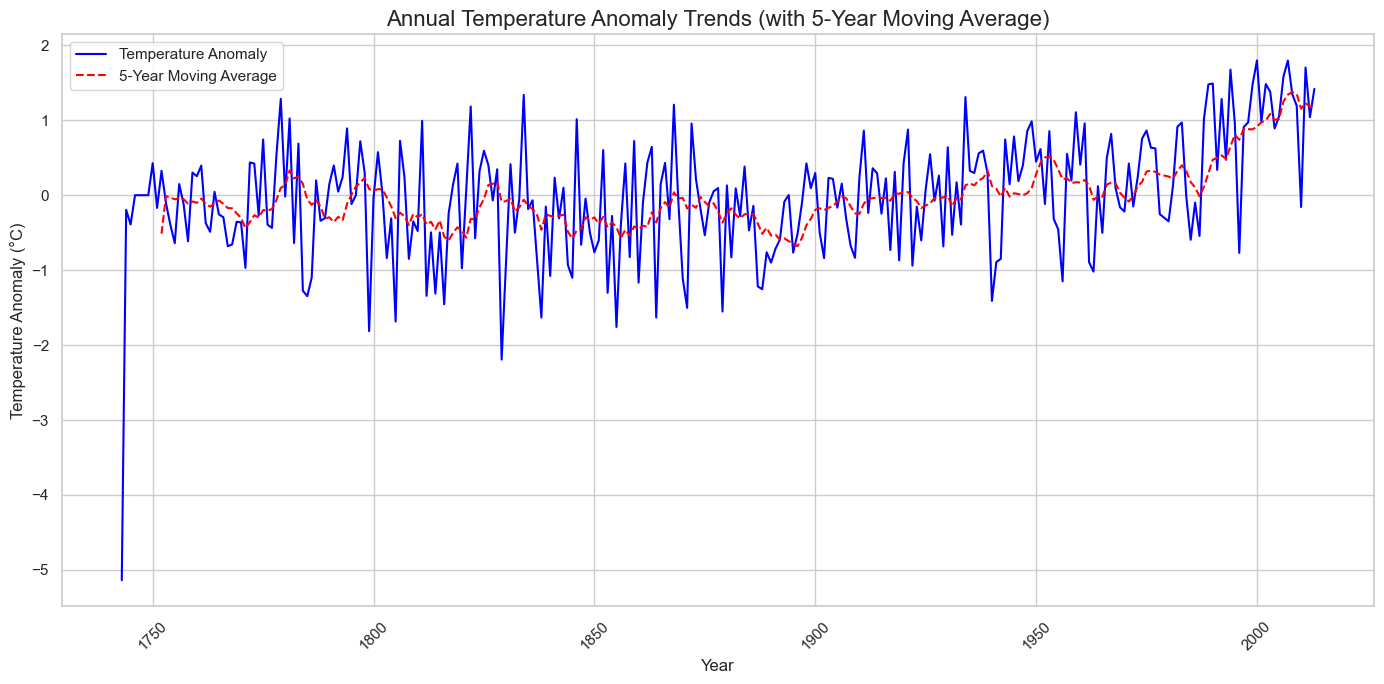

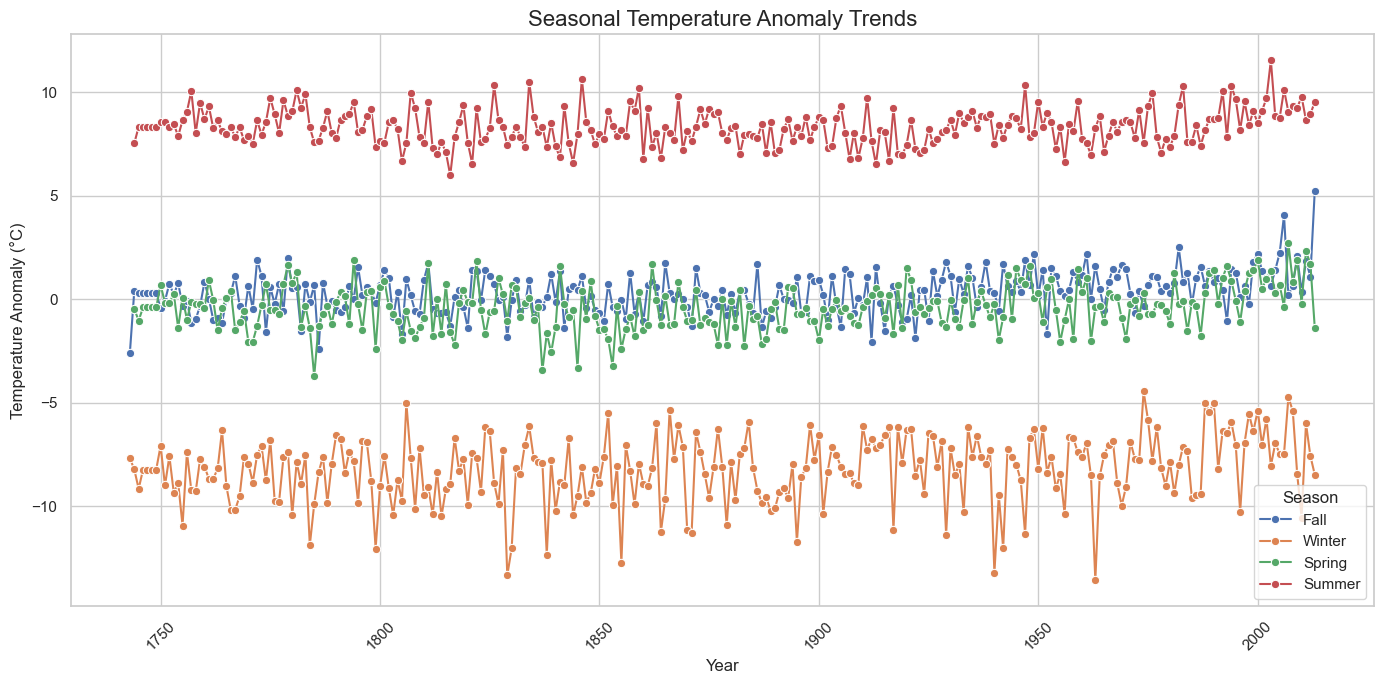

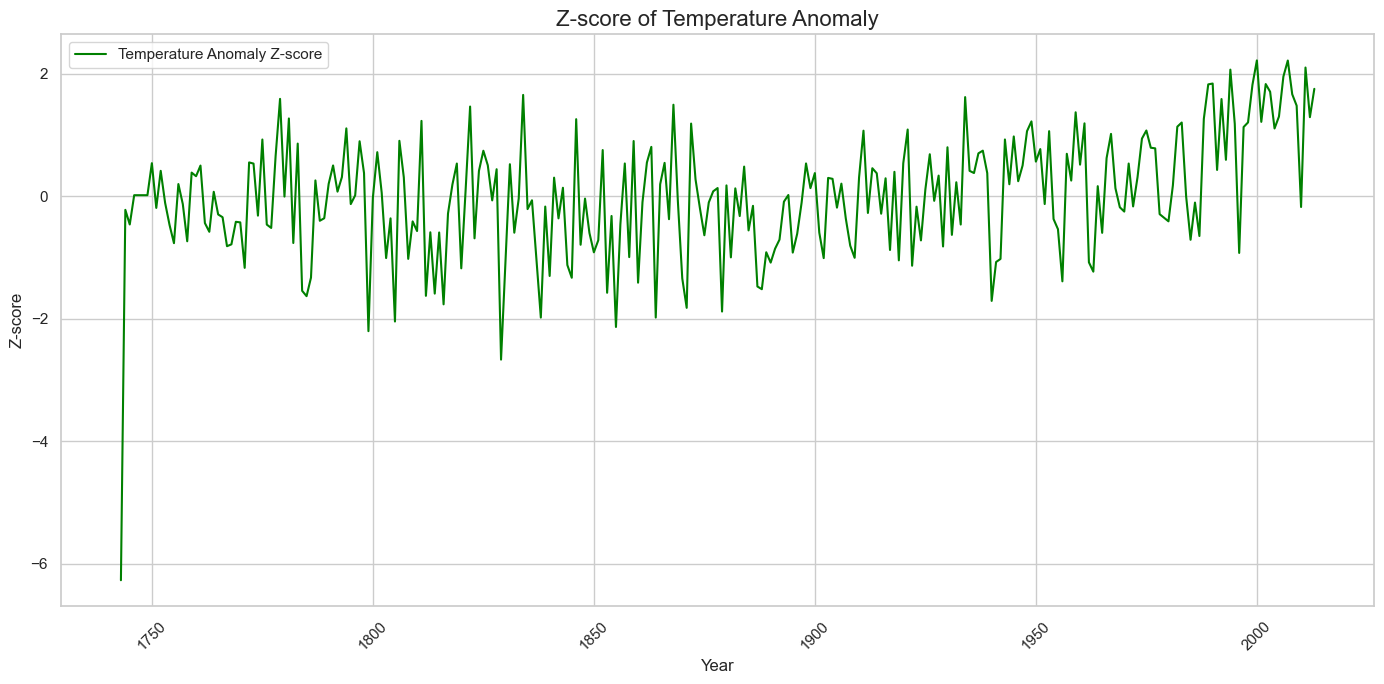

In [81]:
# Set the style for plots
sns.set(style="whitegrid")

# Plotting Annual Temperature Anomaly Trends
plt.figure(figsize=(14, 7))
plt.plot(annual_data['Year'], annual_data['TemperatureAnomaly'], label='Temperature Anomaly', color='blue')
plt.plot(annual_data['Year'], annual_data['TemperatureAnomaly_5yr_MA'], label='5-Year Moving Average', color='red', linestyle='--')
plt.title('Annual Temperature Anomaly Trends (with 5-Year Moving Average)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Seasonal Temperature Anomaly Trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=seasonal_data, x='Year', y='TemperatureAnomaly', hue='Season', marker='o')
plt.title('Seasonal Temperature Anomaly Trends', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Z-score of Temperature Anomaly
plt.figure(figsize=(14, 7))
plt.plot(annual_data['Year'], annual_data['TemperatureAnomaly_Z'], label='Temperature Anomaly Z-score', color='green')
plt.title('Z-score of Temperature Anomaly', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Z-score', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


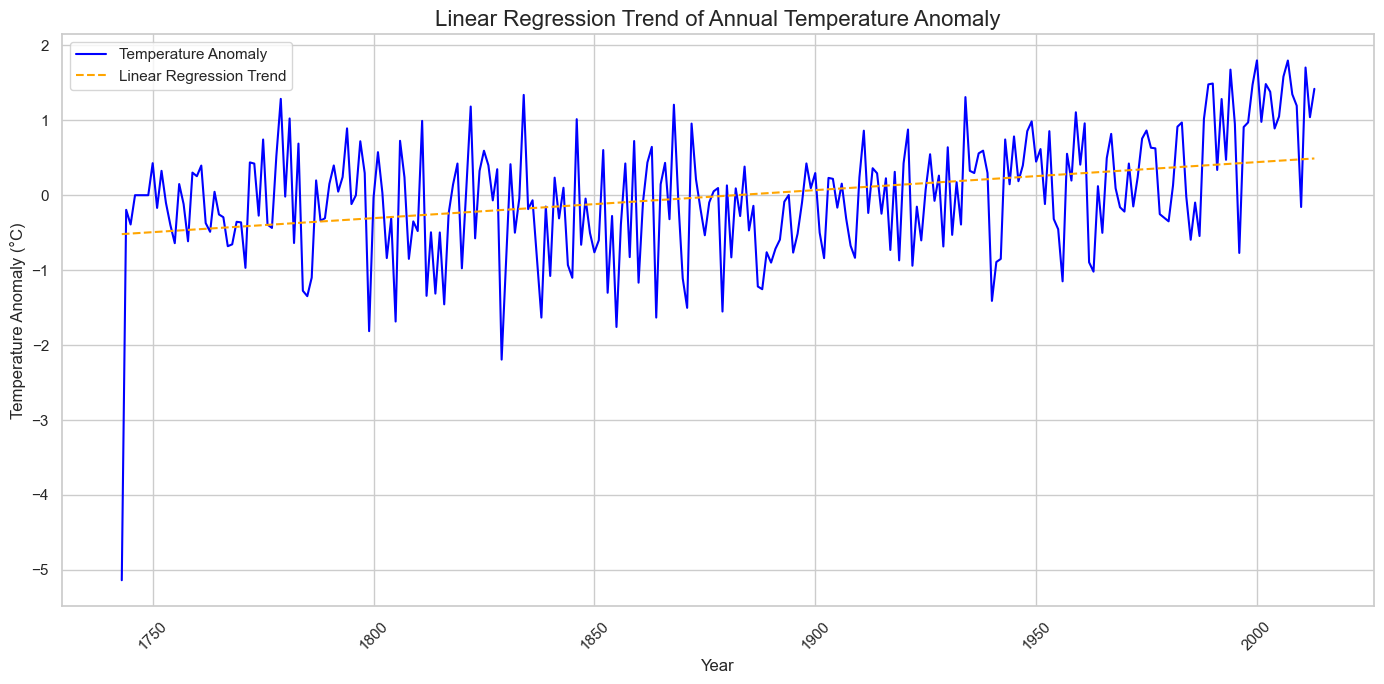

In [61]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape data for linear regression
X = annual_data['Year'].values.reshape(-1, 1)  # Year as independent variable
y = annual_data['TemperatureAnomaly'].values  # Temperature Anomaly as dependent variable

# Perform Linear Regression
model = LinearRegression()
model.fit(X, y)

# Predict values (trend line)
y_pred = model.predict(X)

# Plot the original data and the linear regression trend
plt.figure(figsize=(14, 7))
plt.plot(annual_data['Year'], annual_data['TemperatureAnomaly'], label='Temperature Anomaly', color='blue')
plt.plot(annual_data['Year'], y_pred, label='Linear Regression Trend', color='orange', linestyle='--')
plt.title('Linear Regression Trend of Annual Temperature Anomaly', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
# Predicted values using the linear regression model
y_pred = model.predict(X)

# Evaluate model performance
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'R-squared: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


R-squared: 0.1285
Mean Absolute Error (MAE): 0.5882
Mean Squared Error (MSE): 0.5801
Root Mean Squared Error (RMSE): 0.7616


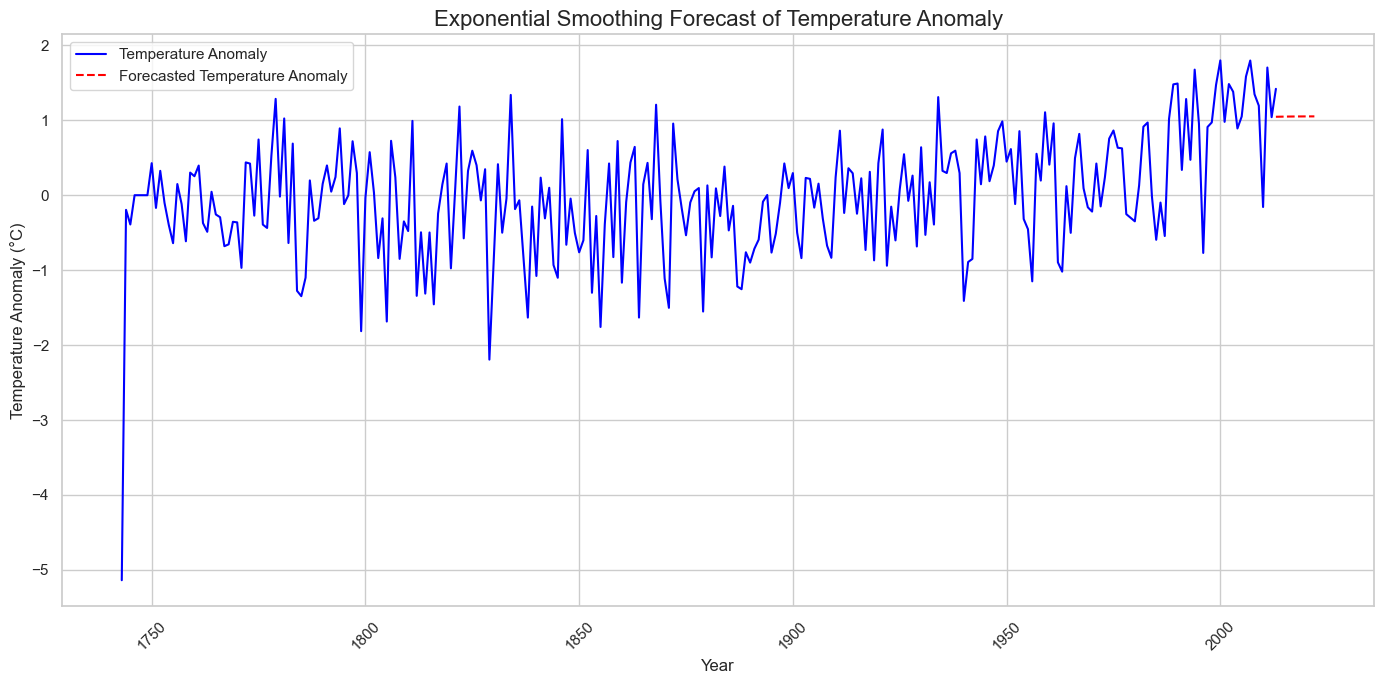

In [54]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Exponential Smoothing
model = ExponentialSmoothing(annual_data['TemperatureAnomaly'], trend='add', seasonal=None, damped_trend=True)
model_fit = model.fit()

# Forecasting the next 10 years
forecast = model_fit.forecast(steps=10)

# Plotting the original data and forecasted values
plt.figure(figsize=(14, 7))
plt.plot(annual_data['Year'], annual_data['TemperatureAnomaly'], label='Temperature Anomaly', color='blue')
plt.plot(np.arange(annual_data['Year'].max(), annual_data['Year'].max() + 10), forecast, label='Forecasted Temperature Anomaly', color='red', linestyle='--')
plt.title('Exponential Smoothing Forecast of Temperature Anomaly', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Checking Stationarity

In [71]:
# Assuming you have 'TemperatureAnomaly' or 'AverageTemperature' as your time series column
def check_stationarity(series):
    result = adfuller(series.dropna())  # Drop missing values before applying the test
    print("ADF Statistic: ", result[0])
    print("p-value: ", result[1])
    
    if result[1] < 0.05:
        print("The series is likely stationary (reject the null hypothesis)")
    else:
        print("The series is likely non-stationary (fail to reject the null hypothesis)")

# Check stationarity for the 'TemperatureAnomaly' column
check_stationarity(data_country['AverageTemperature'])


ADF Statistic:  -17.091307997331626
p-value:  7.587359916916326e-30
The series is likely stationary (reject the null hypothesis)
